In [33]:
from scipy.linalg import fractional_matrix_power
import numpy as np
from scipy.optimize import curve_fit,bisect
import matplotlib.pyplot as plt
import sympy as sp


#Function to fit log transformed data
def func1(D2,m,b):
    #logN=loga+klogD
    #logD=D2 andlogN=mean2
    #loga=b and k=m
    return m*D2 +b

#Function to fit original data
def func2(D,a,k):
    return a*D**(k)

#Function relating N(1) to time
def time_func(T):
    a=5.44*10**(-14)
    b=6.93
    c=8.38*10**(-4)
    return a*(np.exp(b*T)-1)+c*T-N_1 #=N(1)

def cumsum(data,area):
    data_cumsum = np.zeros(data.shape)
    data_cumsum[:,0] = data[::-1,0]

    if len(data[0,:])>2:
        for i in range(1,len(data[0,:])):
            data_cumsum[:,i] = np.cumsum(data[::-1,i])/area[i-1]

            data_cumsum[:,i]=data_cumsum[::-1,i]
    else:
        data_cumsum[:,1] = np.cumsum(data[::-1,1])/area[0]
        data_cumsum[:,1]= data_cumsum[::-1,1]
    data_cumsum[:,0]=data_cumsum[::-1,0]
    #print(data_cumsum)
    return data_cumsum


def data_fit(data_cumsum,color,label=None):

    D = data_cumsum[:,0]
    N  = len(D)

    mean = np.zeros(N)
    err=np.zeros(N)

    for i in range(N):
        mean[i] = (np.mean(data_cumsum[i,1:]))#average value for N in each bin
        err[i]=(np.std(data_cumsum[i,1:]))#stanard deviation for each bin
    #print(mean)

    #Logarithmic transformation
    mean2=np.log10(mean)
    D2=np.log10(D)

    #N=a*D**k
    #LogN=Loga +kLogD
    #N2=b+m*D2
    popt,pcov = curve_fit(func1,D2,mean2)
    m,b=popt

    k = m
    a = 10**(b)

    print('m:',m,'b:',b)
    #print('a:',a,'k:',k)
    ax.errorbar(D,mean,yerr=err,fmt='.',color=color)
    ax.plot(D,func2(D,a,k),color=color,label=label)



    ax.set_xlabel('D km')
    ax.set_ylabel('N/s km$^{-2}$')

    return a,k



m: -2.055574448382701 b: -0.779504391868676
m: -2.6623645901926336 b: 0.5376109525185799
This gives N(1)= 0.0084
The surface age is 3.6521347341288215
m: -3.4428532991591068 b: -2.4653106905217617
This gives N(1)= 0.00368
The surface age is 3.385260317506936


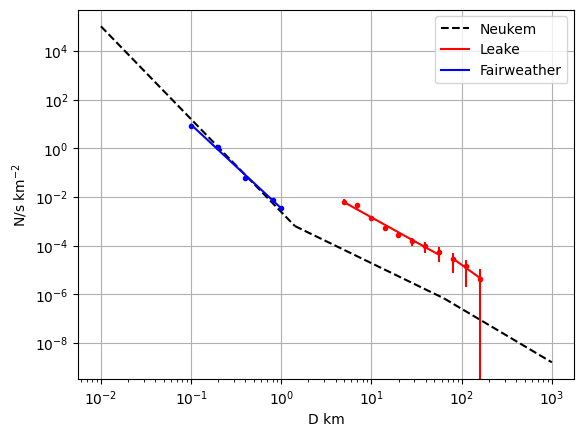

In [35]:
#Create plot
fig=plt.figure()
ax = fig.add_subplot(111)
ax.grid(True)

#Range for Neukem data
d1=np.arange(.01,1.41,.001)
d2=np.arange(1.41,64,.001)
d3=np.arange(64,1000,.01)
#Relation for Neukem data
n1=(10**(-2.616))*d1**(-3.82)
n2=(10**(-2.920))*d2**(-1.80)
n3=(10**(-2.198))*d3**(- 2.20)
#Plot of Neukem data
ax.plot(d1,n1,'k--',label='Neukem')
ax.plot(d2,n2,'k--')
ax.plot(d3,n3,'k--')

#Range for surface age bisection
T = np.arange(0,4.6,0.000001)

#Leake's data
area=np.array([6.7045e4,6.9240e4,1.7595e5,1.0175e5,1.6559e5,1.0537e5])
data = np.genfromtxt('Leake_1982.txt', comments='#',usecols=(0,1,2,3,4,5,6))
data_cumsum=cumsum(data,area)#Cumulutive sum of Leake's crater counts

#Split at 64km diameter
a_idx = np.where(np.logical_and(1.4<data_cumsum[:,0],data_cumsum[:,0]<64))[0]
b_idx = np.where(64<=data_cumsum[:,0])[0]
data1 = data_cumsum[a_idx,:]
data2 = data_cumsum[b_idx,:]

#Fit and plot for leaks data
a1,k1=data_fit(data1,'red','Leake')
a2,k2=data_fit(data2,'red')

#N(1) parameter for Leake
N_1=data1[0,1]
print('This gives N(1)=',round(N_1,5))
#Bisect surface age for Leake
Tau = bisect(time_func,0,4.6)
print('The surface age is', Tau)

#Fairweather Data
area2=[272]
data_fair = np.genfromtxt('Fairweather_Data.txt',comments='#',usecols=(0,1))
'''
data_fair[:,1]=data_fair[:,1]/area2[0]
data_fair[:,0]=data_fair[:,0]
'''
data_fair=cumsum(data_fair,area2)

a3,k3=data_fit(data_fair,'blue','Fairweather')


#N(1) parameter for Fairweather
N_1 = 1/area2[0]
print('This gives N(1)=',round(N_1,5))

#Bisect surface age for Fairweather
Tau = bisect(time_func,0,4.6)
print('The surface age is', Tau)

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
